In [1]:
import hifive
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

hic=hifive.HiC('project_file', 'r')

In [2]:
type(hic)

hifive.hic.HiC

In [3]:
# get data for chromosome 13 at 1Mb resolution
data = hic.cis_heatmap('chr13', 1000000, datatype='fend', arraytype='full', diagonalincluded=True)
data[:,:,0]+=1
data[:,:,1]+=1
enrichment = data[:, :, 0] / data[:, :, 1]
enrichment = np.log(enrichment)

Finding fend full array for chr13:1000000-120250001... Done


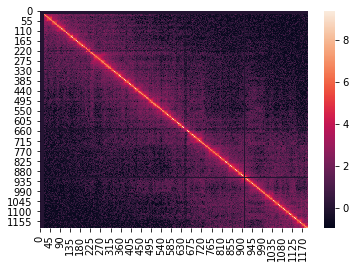

In [4]:
import seaborn as sns
sns.heatmap(enrichment)

In [5]:
# compartment analysis
Comp = hifive.hic_domains.Compartment(hic, 100000, chroms=['chr13'], out_fname='tmp.hdf5')
Comp.write_eigen_scores('hic_comp.bed')

Casting complex values to real discards the imaginary part


In [6]:
X = Comp.positions['chr13']
Y = Comp.eigenv['chr13']

In [7]:
# look for fpkm values from genes in the WT_fpkm.bed files
# group these genes into two categories based on + or - compartment 
chr13_score=open('chr13_compartment.bed', 'r')
exp_negscore=[]
exp_posscore=[]

for line in chr13_score:
    if float(line.split()[-1])<0:
        exp_negscore.append(float(line.split()[4]))
    if float(line.split()[-1])>=0:
        exp_posscore.append(float(line.split()[4]))
exp_posscore01=list(np.asarray(exp_posscore) + 0.1)
exp_negscore01=list(np.asarray(exp_negscore) + 0.1)
log_exp_pos=np.log10(exp_posscore01)
log_exp_neg=np.log10(exp_negscore01)

In [8]:
import pandas as pd
df_pos=pd.DataFrame({"Expression": log_exp_pos})
df_pos['Compartment score']='positive'
df_neg=pd.DataFrame({"Expression": log_exp_neg})
df_neg['Compartment score']='negative'

df_exp=pd.concat([df_pos, df_neg])

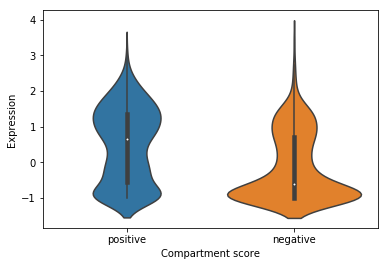

In [9]:
ax=sns.violinplot('Compartment score', 'Expression', data=df_exp)

In [10]:
import pyBigWig
bw = pyBigWig.open('data/WT_H3K27me3.bw')

In [12]:
del line
del chr13_score

rep_neg=[]
rep_pos=[]
chr13_score=open('chr13_compartment.bed', 'r')
for line in chr13_score:
    if float(line.split()[-1])<0:
        rep_neg.append((bw.stats('chr13', int(line.split()[1]), int(line.split()[2]), type='sum'))[0])
    if float(line.split()[-1])>=0:
        rep_pos.append((bw.stats('chr13', int(line.split()[1]), int(line.split()[2]), type='sum'))[0])

       

In [28]:
# replace "None" in the H3K27me3 data with 0
for n, v in enumerate(rep_neg):
    if v==None:
        rep_neg[n]=0
        

for n, v in enumerate(rep_pos):
    if v==None:
        rep_pos[n]=0
        

Text(0.5,1,'Negative compartment score')

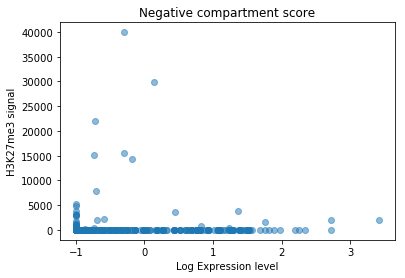

In [36]:
plt.scatter(log_exp_neg, rep_neg, alpha=0.5)
plt.xlabel('Log Expression level')
plt.ylabel('H3K27me3 signal')
plt.title('Negative compartment score')

Text(0.5,1,'Positive compartment score')

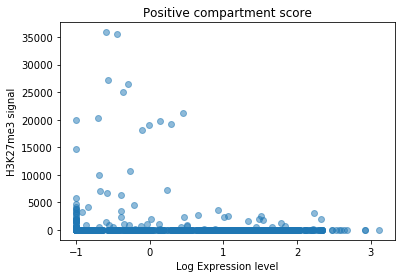

In [39]:
plt.scatter(log_exp_pos, rep_pos, alpha=0.5)
plt.xlabel('Log Expression level')
plt.ylabel('H3K27me3 signal')
plt.title('Positive compartment score')